In [1]:
%matplotlib inline

In [148]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pygsp
from pygsp import graphs, filters
import networkx as nx
import pickle
import collections

In [3]:
#import graphs: 
#Gnx = nx.read_gpickle('graph.gpickle')

In [58]:
#stupid examples 
A_1 = np.array([[0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0]])

In [174]:
A_4 = np.array([[0,1,0],[0,0,0],[0,1,0]])

In [175]:
A_5=np.array([[0,1],[0,0]])

In [176]:
G_1=nx.DiGraph(A_1)
G_2=nx.from_numpy_matrix(A_1)
G_3=nx.from_numpy_matrix(A_1)
G_4=nx.from_numpy_matrix(A_4)
G_5=nx.from_numpy_matrix(A_5)

In [116]:
Graphs=[G_1,G_2,G_3,G_4,G_5]

In [117]:
G_5=nx.DiGraph(A_5)

In [118]:
len(G_5.edges)

1

# Is Missing: Extract strongly connectected components, degree distributions of in and out degrees, Diameter of undirected graphs 

# Basic properties of the graphs


We study basic properties of the graph such as number of nodes, number of edges, strongly connectedness, the diameter and the average clustering coefficient

In [157]:
i=1
for G in Graphs: 
    print ('The graph G_{} has {} nodes and {} edges '. format(i, len(G.nodes),len(G.edges)))
    i+=1

The graph G_1 has 6 nodes and 18 edges 
The graph G_2 has 6 nodes and 9 edges 
The graph G_3 has 6 nodes and 9 edges 
The graph G_4 has 6 nodes and 6 edges 
The graph G_5 has 2 nodes and 1 edges 


In [160]:
# Check if the graph is strongly connected (if not, diameter=infinity)
i=1
for G in Graphs :
    if nx.is_strongly_connected(G):
        print('The graph G_{} is strongly connected and its diameter is {}'.format(i, nx.diameter(G)))
    else: 
        print('The graph G_{} is not strongly connected'.format(i))
    i=1+1

The graph G_1 is strongly connected and its diameter is 2


NetworkXNotImplemented: not implemented for undirected type

In [67]:
#compute average clustering coefficient: 
i=1
for G in Graphs:
    print('The graph G_{} has average clustering coefficient {}'.format(i,nx.average_clustering(G)))
    i=i+1

The graph G_1 has average clustering coefficient 0.2777777777777778
The graph G_2 has average clustering coefficient 0.2777777777777778
The graph G_3 has average clustering coefficient 0.2777777777777778
The graph G_4 has average clustering coefficient 0.0


# Degree Distribution


question: as the graph is directed: do we compute the in-degree, out-degree or total degree?


In [187]:
#Only works for undirected case 
#plot the degree histograms of an undirected graph 
def plot_degree(G, name):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

# draw graph in inset
#plt.axes([0.4, 0.4, 0.5, 0.5])
#Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
#pos = nx.spring_layout(G)
#plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

    plt.show()

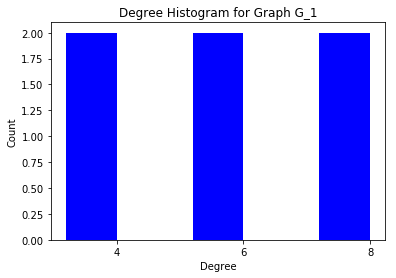

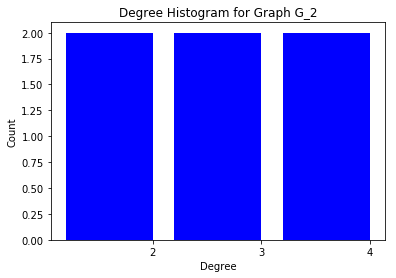

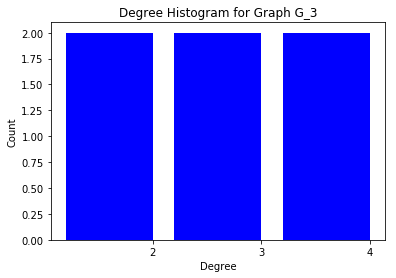

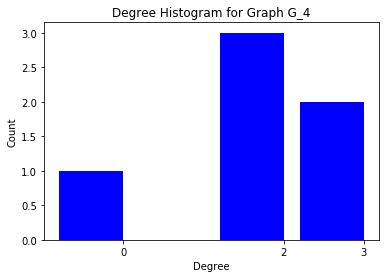

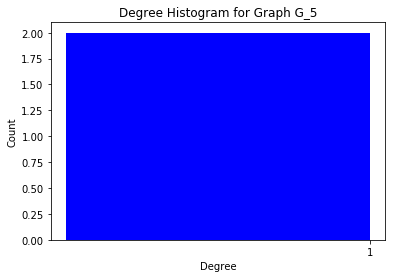

In [189]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_degree(G,name)
    i+=1